# Nguyen Thi Kieu Nhung 11203041


In [24]:
# !pip install torch

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import torch


**Bài 1:**

Cho phương trình f(x)= x^2, hãy sử dụng thuật toán gradient descent để tối ưu. Sau đó vẽ đồ thị hàm f(x) sau 10 lần cập nhật bước 2 với:
* Lr = 0.2
* Lr = 2


In [26]:
def grad(x):
    return 2*x

def cost(x):
    return x**2
f1_x = []
f2_x = []
def myGD(eta, x0, num_iters, f_x):
    x = [x0]
    for it in range(num_iters):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
        f_x.append(x_new ** 2)

    return x, f_x

In [27]:
myGD(0.2, 2, 10, f1_x)

([2,
  1.2,
  0.72,
  0.432,
  0.2592,
  0.15552,
  0.09331199999999999,
  0.055987199999999994,
  0.033592319999999995,
  0.020155391999999994,
  0.012093235199999997],
 [1.44,
  0.5184,
  0.18662399999999998,
  0.06718463999999999,
  0.024186470399999997,
  0.008707129343999998,
  0.0031345665638399995,
  0.0011284439629823996,
  0.0004062398266736638,
  0.00014624633760251896])

In [28]:
myGD(2,2,10, f2_x)


([2, -6, 18, -54, 162, -486, 1458, -4374, 13122, -39366, 118098],
 [36,
  324,
  2916,
  26244,
  236196,
  2125764,
  19131876,
  172186884,
  1549681956,
  13947137604])

Text(0, 0.5, 'y = f(x)')

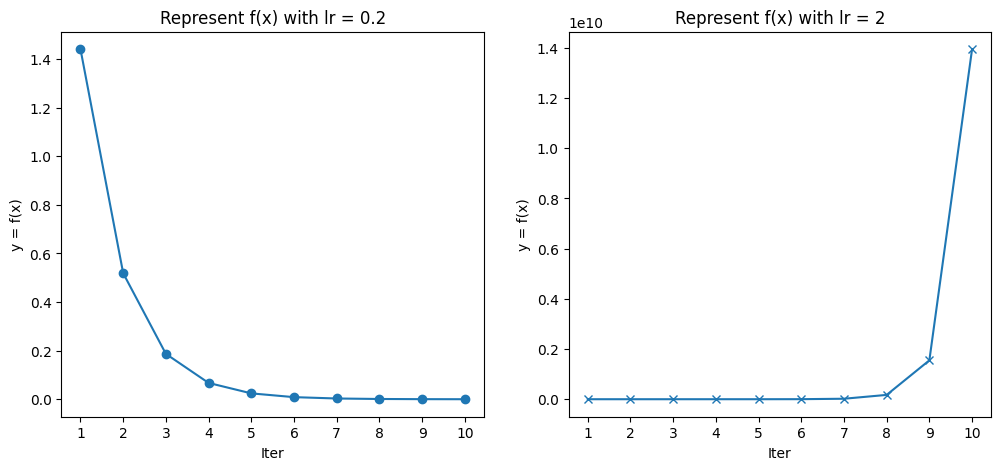

In [29]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(np.arange(1, 11), f1_x, marker='o', linestyle='-')
plt.title('Represent f(x) with lr = 0.2')
plt.xticks(np.arange(1, 11))
plt.xlabel('Iter')
plt.ylabel('y = f(x)')

plt.subplot(1,2,2)
plt.plot(np.arange(1, 11), f2_x, marker='x', linestyle='-')
plt.xticks(np.arange(1, 11))
plt.title('Represent f(x) with lr = 2')
plt.xlabel('Iter')
plt.ylabel('y = f(x)')

Bài 2:
Cho dataset dự đoán giá nhà dựa vào diện tích (https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_linear.csv) Dựa vào code mẫu hãy
* Implement thuật toán linear regression với dữ liệu trên
* Chỉnh learning rate cho dữ liệu trên, chọn 1 learning rate lớn bị overshoot, 1 learning vừa, và 1 learning rate nhỏ. Với mỗi learning rate, vẽ đồ thị loss tương ứng
* Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test


In [30]:
url = "https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv"
data = pd.read_csv(url)
data.head(5)

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418


In [54]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv"
data = pd.read_csv(url)
X = data['Diện tích'].values.reshape(-1, 1)
y = data['Giá'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

def train_model(lr, num_epochs, X_train, y_train):
    model = LinearRegressionModel()
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    losses = []

    for epoch in range(num_epochs):
        inputs = torch.from_numpy(X_train).float()
        labels = torch.from_numpy(y_train).float().view(-1, 1)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    return model, losses

learning_rates = [1, 0.01, 0.001]




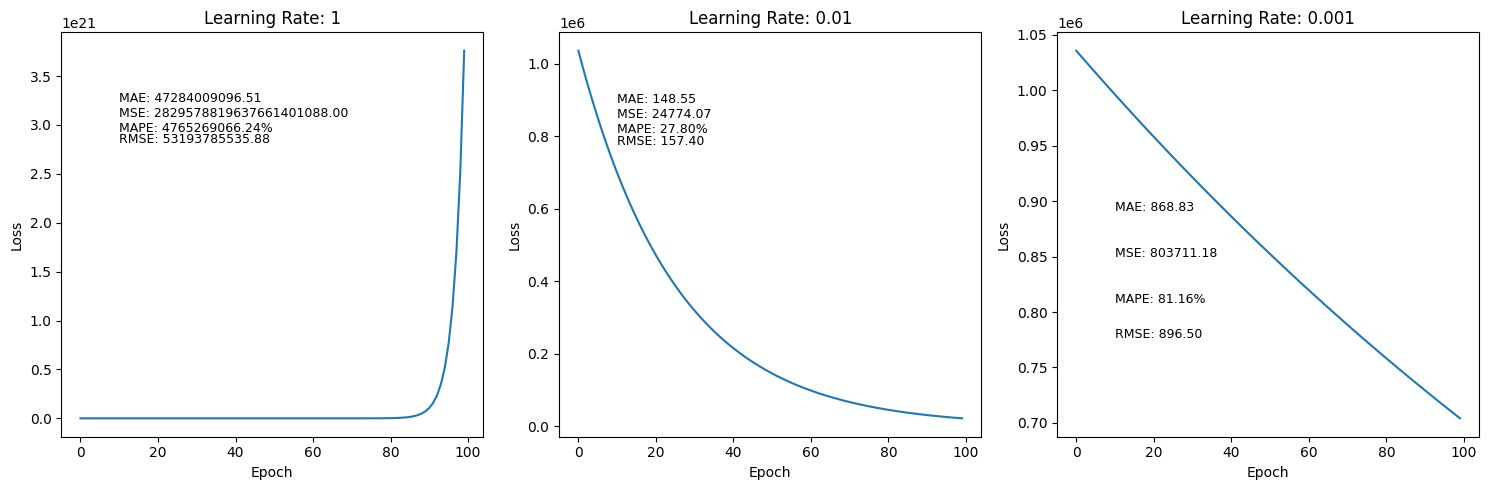

In [65]:
learning_rates = [1, 0.01, 0.001]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, lr in enumerate(learning_rates):
    model, losses = train_model(lr, num_epochs=100, X_train=X_train, y_train=y_train)

    axs[i].plot(losses)
    axs[i].set_title(f'Learning Rate: {lr}')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Loss')

    X_test_tensor = torch.from_numpy(X_test).float()
    y_pred = model(X_test_tensor).detach().numpy()

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    axs[i].text(10, max(losses) * 0.82, f'MSE: {mse:.2f}', fontsize=9)
    axs[i].text(10, max(losses) * 0.75, f'RMSE: {rmse:.2f}', fontsize=9)
    axs[i].text(10, max(losses) * 0.86, f'MAE: {mae:.2f}', fontsize=9)
    axs[i].text(10, max(losses) * 0.78, f'MAPE: {mape:.2f}%', fontsize=9)

plt.tight_layout()
plt.show()